# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

Dataset yang digunakan adalah data "Telco Customer Churn"

Dataset Context

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs."

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Sumber: https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
print("Shape dataset:", df.shape)
df.head()

Shape dataset: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

##**1. Analisis Struktur Data**

In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
df.shape

(7043, 21)

In [5]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


**Insight:**
- Terdapat beberapa data numerik yang bertipe salah, seperti totalcharges yang seharusnya numerikal seperti totalcharges

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [7]:
# Cek duplikasi data
print(f"\nJumlah duplikat pada file csv: {df.duplicated().sum()}")


Jumlah duplikat pada file csv: 0


##**2. Menangani Data Hilang**

In [8]:
#Cek data kosong
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


##**3. Analisis Distribusi Data**

Mengelompokkan data numerik dan kategorikal

In [9]:
import pandas as pd

def categorize_features(df):
    # Salin DataFrame agar tidak mengubah data asli
    df = df.copy()

    # Identifikasi fitur numerik (tipe data int64 atau float64)
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Identifikasi fitur kategorikal (tipe object atau category)
    categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

    # Identifikasi fitur boolean (0/1) dan ubah menjadi kategori "Yes"/"No"
    for col in numerical_features:
        if sorted(df[col].dropna().unique()) == [0, 1]:
            df[col] = df[col].map({0: 'No', 1: 'Yes'})
            categorical_features.append(col)
            numerical_features.remove(col)

    # Konversi semua fitur kategorikal menjadi tipe 'category'
    for col in categorical_features:
        df[col] = df[col].astype('category')

    return df, numerical_features, categorical_features

# Terapkan fungsi untuk mengklasifikasikan fitur
df, numerical_features, categorical_features = categorize_features(df)

# Eksklusi customer ID (Variabel independen)
categorical_features = [col for col in categorical_features if col != 'customerID']

# Tampilkan hasil
print(f"Fitur numerik: {numerical_features}")
print(f"Fitur kategorikal: {categorical_features}")

df.dtypes

Fitur numerik: ['tenure', 'MonthlyCharges', 'TotalCharges']
Fitur kategorikal: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'SeniorCitizen']


,0
customerID,category
gender,category
SeniorCitizen,category
Partner,category
Dependents,category
tenure,int64
PhoneService,category
MultipleLines,category
InternetService,category
OnlineSecurity,category


###Visualisasi fitur numerik

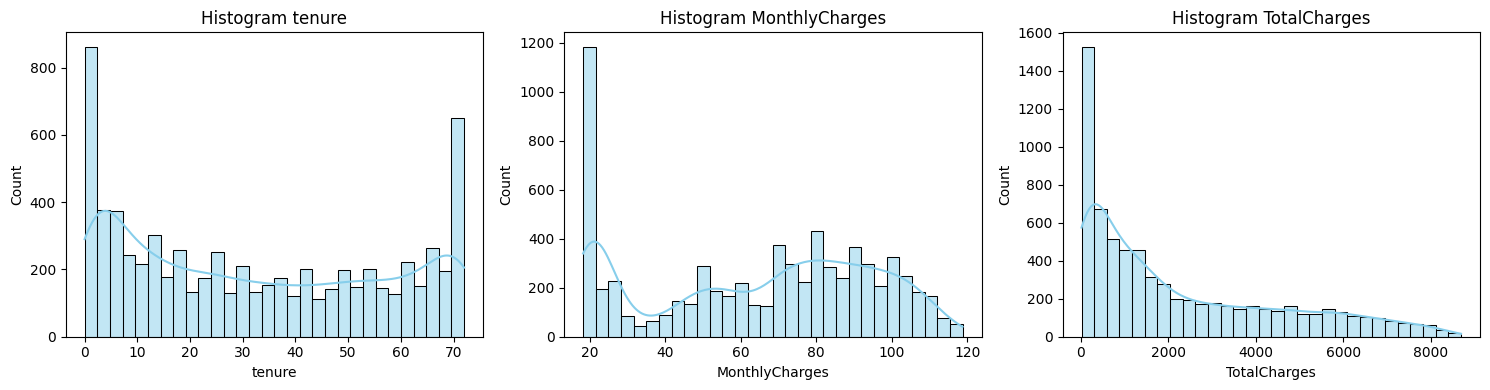

In [10]:
# Visualisasi Histogram
plt.figure(figsize=(15, 4))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Histogram {col}")
plt.tight_layout()
plt.show()

In [11]:
# Analisis matriks korelasi
corr_matrix = df[numerical_features].corr()
print("Matriks Korelasi Variabel Numerik:")
print(corr_matrix)

Matriks Korelasi Variabel Numerik:
                 tenure  MonthlyCharges  TotalCharges
tenure          1.00000        0.247900      0.825880
MonthlyCharges  0.24790        1.000000      0.651065
TotalCharges    0.82588        0.651065      1.000000


###Visualisasi Fitur Kategorikal

<ipython-input-12-9ecfe8e26128>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


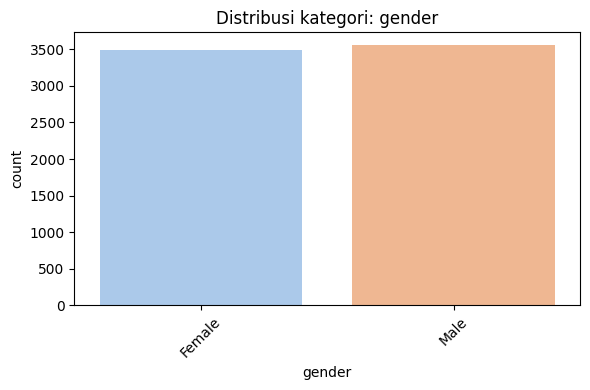

<ipython-input-12-9ecfe8e26128>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


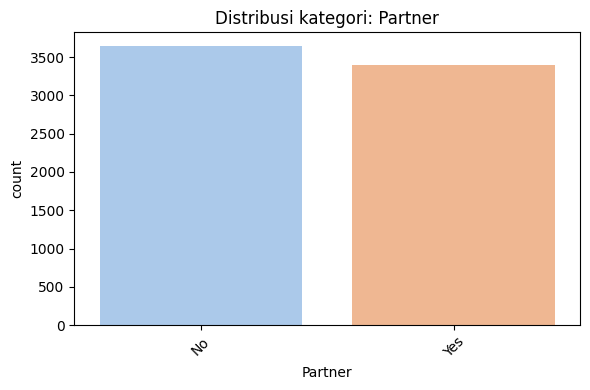

<ipython-input-12-9ecfe8e26128>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


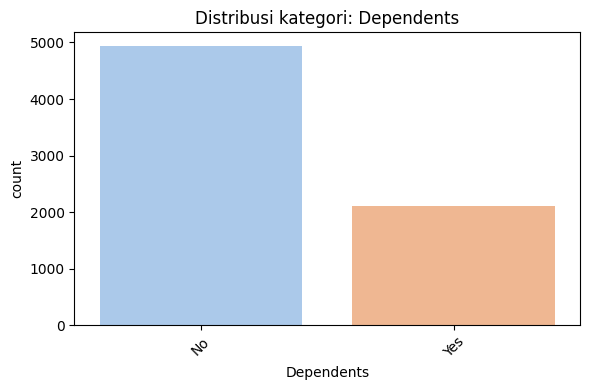

<ipython-input-12-9ecfe8e26128>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


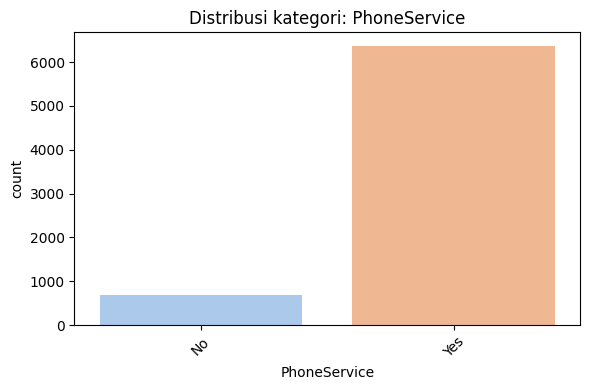

<ipython-input-12-9ecfe8e26128>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


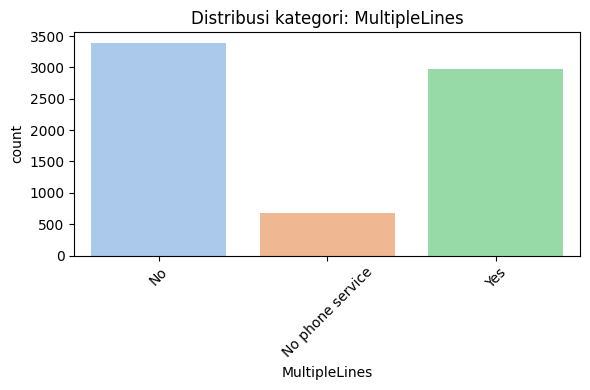

<ipython-input-12-9ecfe8e26128>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


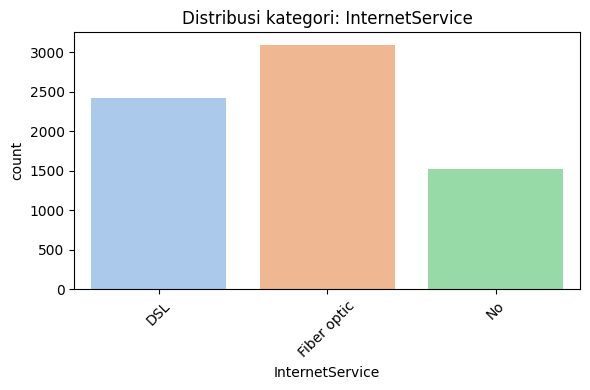

<ipython-input-12-9ecfe8e26128>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


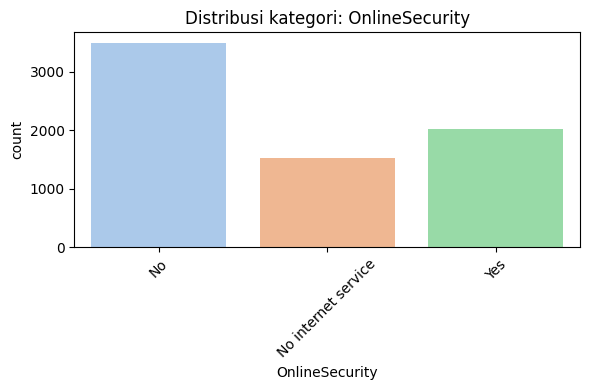

<ipython-input-12-9ecfe8e26128>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


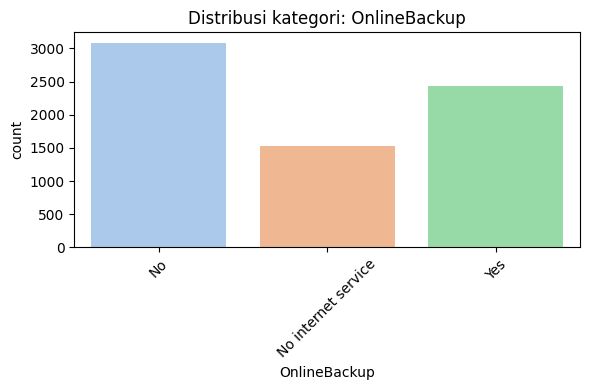

<ipython-input-12-9ecfe8e26128>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


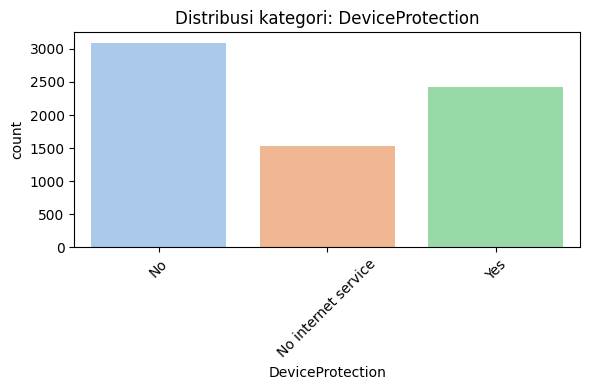

<ipython-input-12-9ecfe8e26128>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


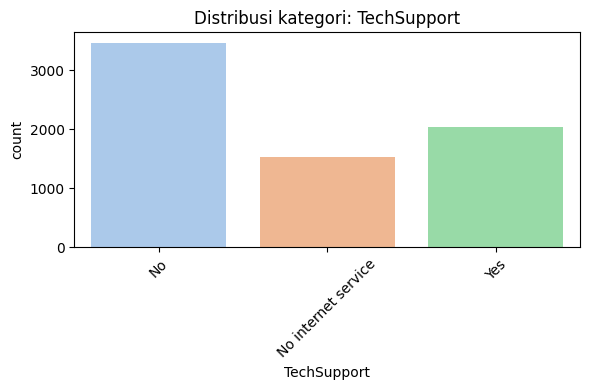

<ipython-input-12-9ecfe8e26128>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


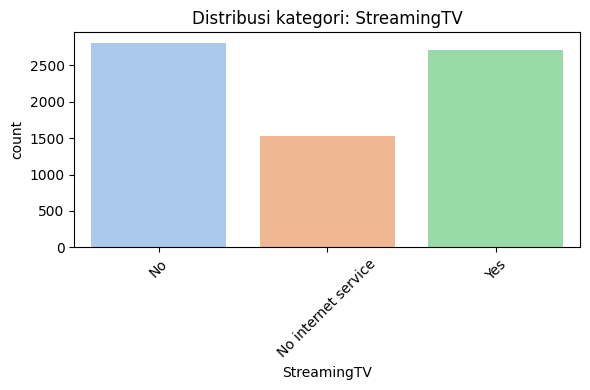

<ipython-input-12-9ecfe8e26128>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


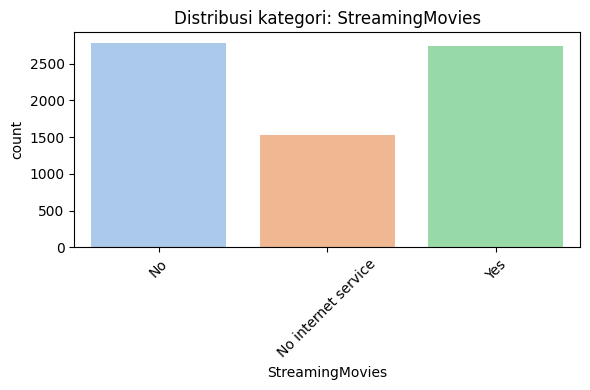

<ipython-input-12-9ecfe8e26128>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


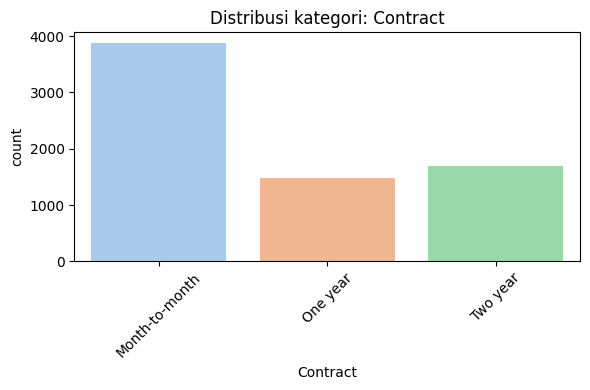

<ipython-input-12-9ecfe8e26128>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


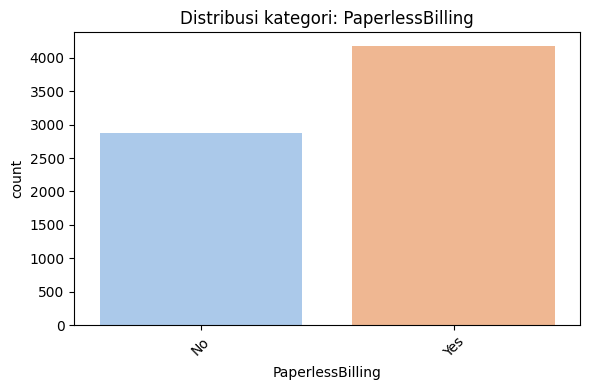

<ipython-input-12-9ecfe8e26128>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


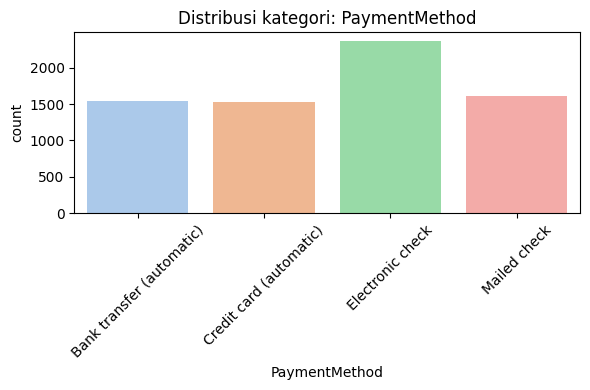

<ipython-input-12-9ecfe8e26128>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


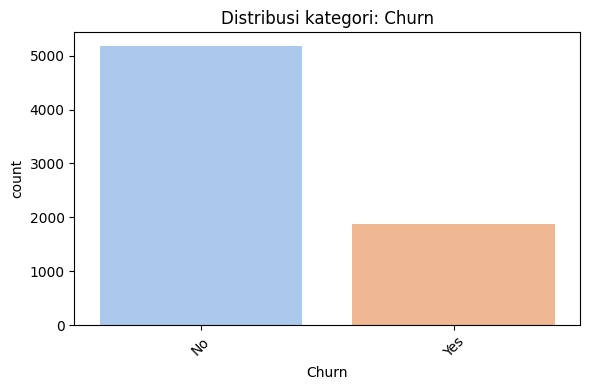

<ipython-input-12-9ecfe8e26128>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


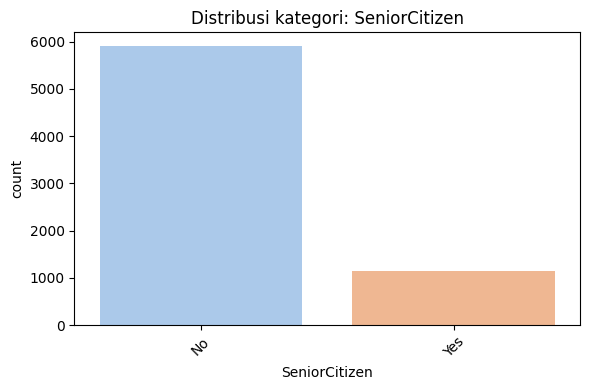

In [12]:
# Tampilkan frekuensi tiap kategori untuk setiap fitur kategorikal
for col in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, palette='pastel')
    plt.title(f"Distribusi kategori: {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

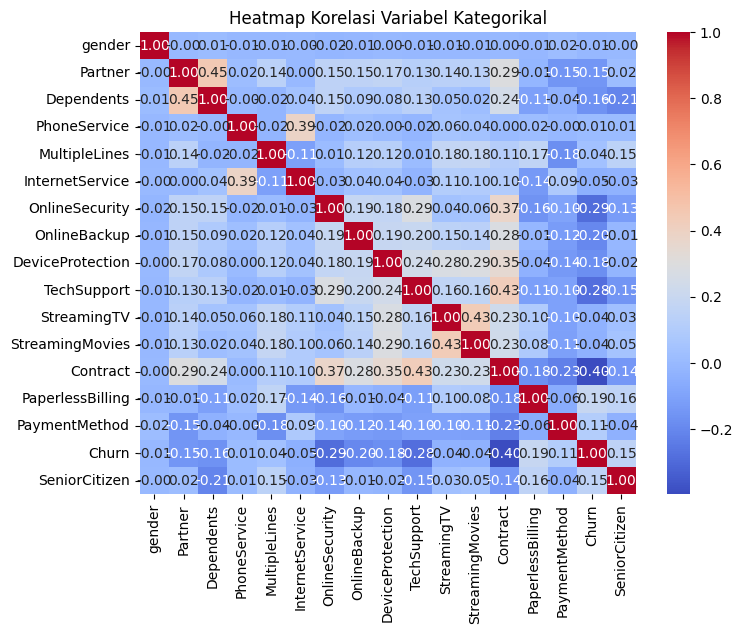

In [13]:
# Encoding data kategorikal
df_cat_encoded = df[categorical_features].apply(lambda x: x.astype('category').cat.codes)
corr_cat = df_cat_encoded.corr()

# Visualisasi korelasi antar variabel kategorikal menggunakan heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_cat, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Variabel Kategorikal")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [14]:
# Drop missing values
df.dropna(inplace=True)

# Drop data duplikat
df.drop_duplicates(inplace=True)

In [15]:
from sklearn.preprocessing import StandardScaler

# Standarisasi fitur numerik
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [16]:
# Cek outliers pada data
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Deteksi outlier untuk tiap fitur numerik
outliers_iqr = {col: detect_outliers_iqr(df, col) for col in numerical_features}

# Menampilkan jumlah outlier per fitur
for col, outliers in outliers_iqr.items():
    print(f"Fitur {col} memiliki {len(outliers)} outlier berdasarkan IQR.")

Fitur tenure memiliki 0 outlier berdasarkan IQR.
Fitur MonthlyCharges memiliki 0 outlier berdasarkan IQR.
Fitur TotalCharges memiliki 0 outlier berdasarkan IQR.


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   category
 1   gender            7032 non-null   category
 2   SeniorCitizen     7032 non-null   category
 3   Partner           7032 non-null   category
 4   Dependents        7032 non-null   category
 5   tenure            7032 non-null   float64 
 6   PhoneService      7032 non-null   category
 7   MultipleLines     7032 non-null   category
 8   InternetService   7032 non-null   category
 9   OnlineSecurity    7032 non-null   category
 10  OnlineBackup      7032 non-null   category
 11  DeviceProtection  7032 non-null   category
 12  TechSupport       7032 non-null   category
 13  StreamingTV       7032 non-null   category
 14  StreamingMovies   7032 non-null   category
 15  Contract          7032 non-null   category
 16  PaperlessBilling  7032 non-nu

In [18]:
# Pengelompokkan data berdasarkan lingkupan analisis
df_scope = df[['Churn', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Contract', 'PaymentMethod']].copy()

df_scope.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Churn           7032 non-null   category
 1   tenure          7032 non-null   float64 
 2   MonthlyCharges  7032 non-null   float64 
 3   TotalCharges    7032 non-null   float64 
 4   Contract        7032 non-null   category
 5   PaymentMethod   7032 non-null   category
dtypes: category(3), float64(3)
memory usage: 240.8 KB


##Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# membuat dataframe sementara
df_copy = df.copy()

df_copy.drop(['customerID'], axis=1, inplace=True)

In [20]:
# Label encoding

# pengumpulan fitur boolean (2 kategori)
label_encoding_cols = ['gender', 'SeniorCitizen','Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

le = LabelEncoder()

# apply Label Encoding
for col in label_encoding_cols:
    df_copy[col] = le.fit_transform(df_copy[col])

df_copy.info()

df_copy.shape

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   int64   
 1   SeniorCitizen     7032 non-null   int64   
 2   Partner           7032 non-null   int64   
 3   Dependents        7032 non-null   int64   
 4   tenure            7032 non-null   float64 
 5   PhoneService      7032 non-null   int64   
 6   MultipleLines     7032 non-null   category
 7   InternetService   7032 non-null   category
 8   OnlineSecurity    7032 non-null   category
 9   OnlineBackup      7032 non-null   category
 10  DeviceProtection  7032 non-null   category
 11  TechSupport       7032 non-null   category
 12  StreamingTV       7032 non-null   category
 13  StreamingMovies   7032 non-null   category
 14  Contract          7032 non-null   category
 15  PaperlessBilling  7032 non-null   int64   
 16  PaymentMethod     7032 non-nu

(7032, 20)

In [21]:
# One-hot encoding
df_copy = pd.get_dummies(df_copy, columns=['MultipleLines', 'InternetService', 'OnlineSecurity',
                                     'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                     'StreamingTV', 'StreamingMovies', 'Contract',
                                     'PaymentMethod'], drop_first=True)

# show the new info
df_copy.info()

df_copy.shape

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   float64
 5   PhoneService                           7032 non-null   int64  
 6   PaperlessBilling                       7032 non-null   int64  
 7   MonthlyCharges                         7032 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7032 non-null   int64  
 10  MultipleLines_No phone service         7032 non-null   bool   
 11  MultipleL

(7032, 31)

In [22]:
# sortir korelasi fitur dengan total churn
df_copy.corr()['Churn'].sort_values(ascending = False)

,Churn
Churn,1.000000
InternetService_Fiber optic,0.307463
PaymentMethod_Electronic check,0.301455
MonthlyCharges,0.192858
PaperlessBilling,0.191454
SeniorCitizen,0.150541
StreamingTV_Yes,0.063254
StreamingMovies_Yes,0.060860
MultipleLines_Yes,0.040033
PhoneService,0.011691


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [23]:
# Menggunakan algoritma K-Means
from sklearn.cluster import KMeans

segmentasi keseluruhan data

In [24]:
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_copy)
    wcss.append(kmeans.inertia_)

    #Silhouette score
    cluster_labels = kmeans.labels_
    sil_score = silhouette_score(df_copy, cluster_labels)
    print(f"Silhouette Score untuk {i} klaster: {sil_score:.3f}")

Silhouette Score untuk 2 klaster: 0.231
Silhouette Score untuk 3 klaster: 0.279
Silhouette Score untuk 4 klaster: 0.226
Silhouette Score untuk 5 klaster: 0.214
Silhouette Score untuk 6 klaster: 0.186
Silhouette Score untuk 7 klaster: 0.162
Silhouette Score untuk 8 klaster: 0.157
Silhouette Score untuk 9 klaster: 0.146
Silhouette Score untuk 10 klaster: 0.135


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

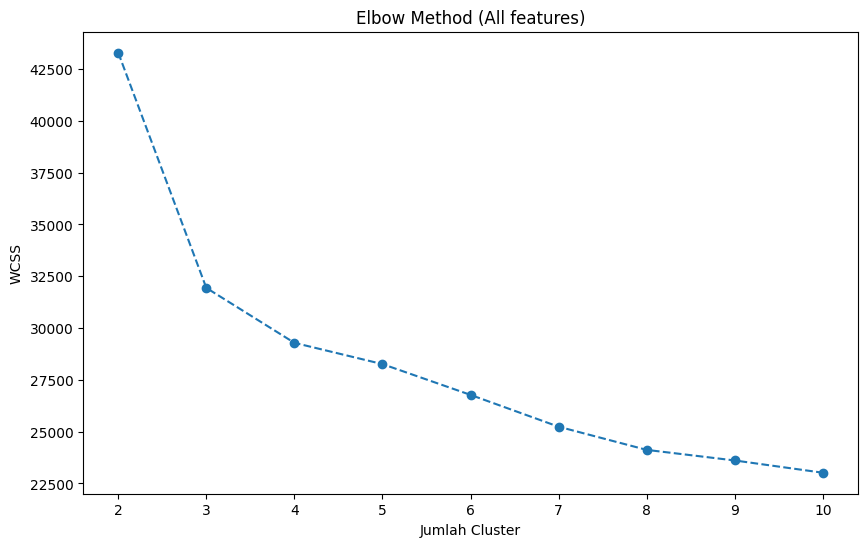

In [25]:
# Elbow Method keseluruhan data
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--') # This line remains unchanged for the first plot
plt.title('Elbow Method (All features)')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

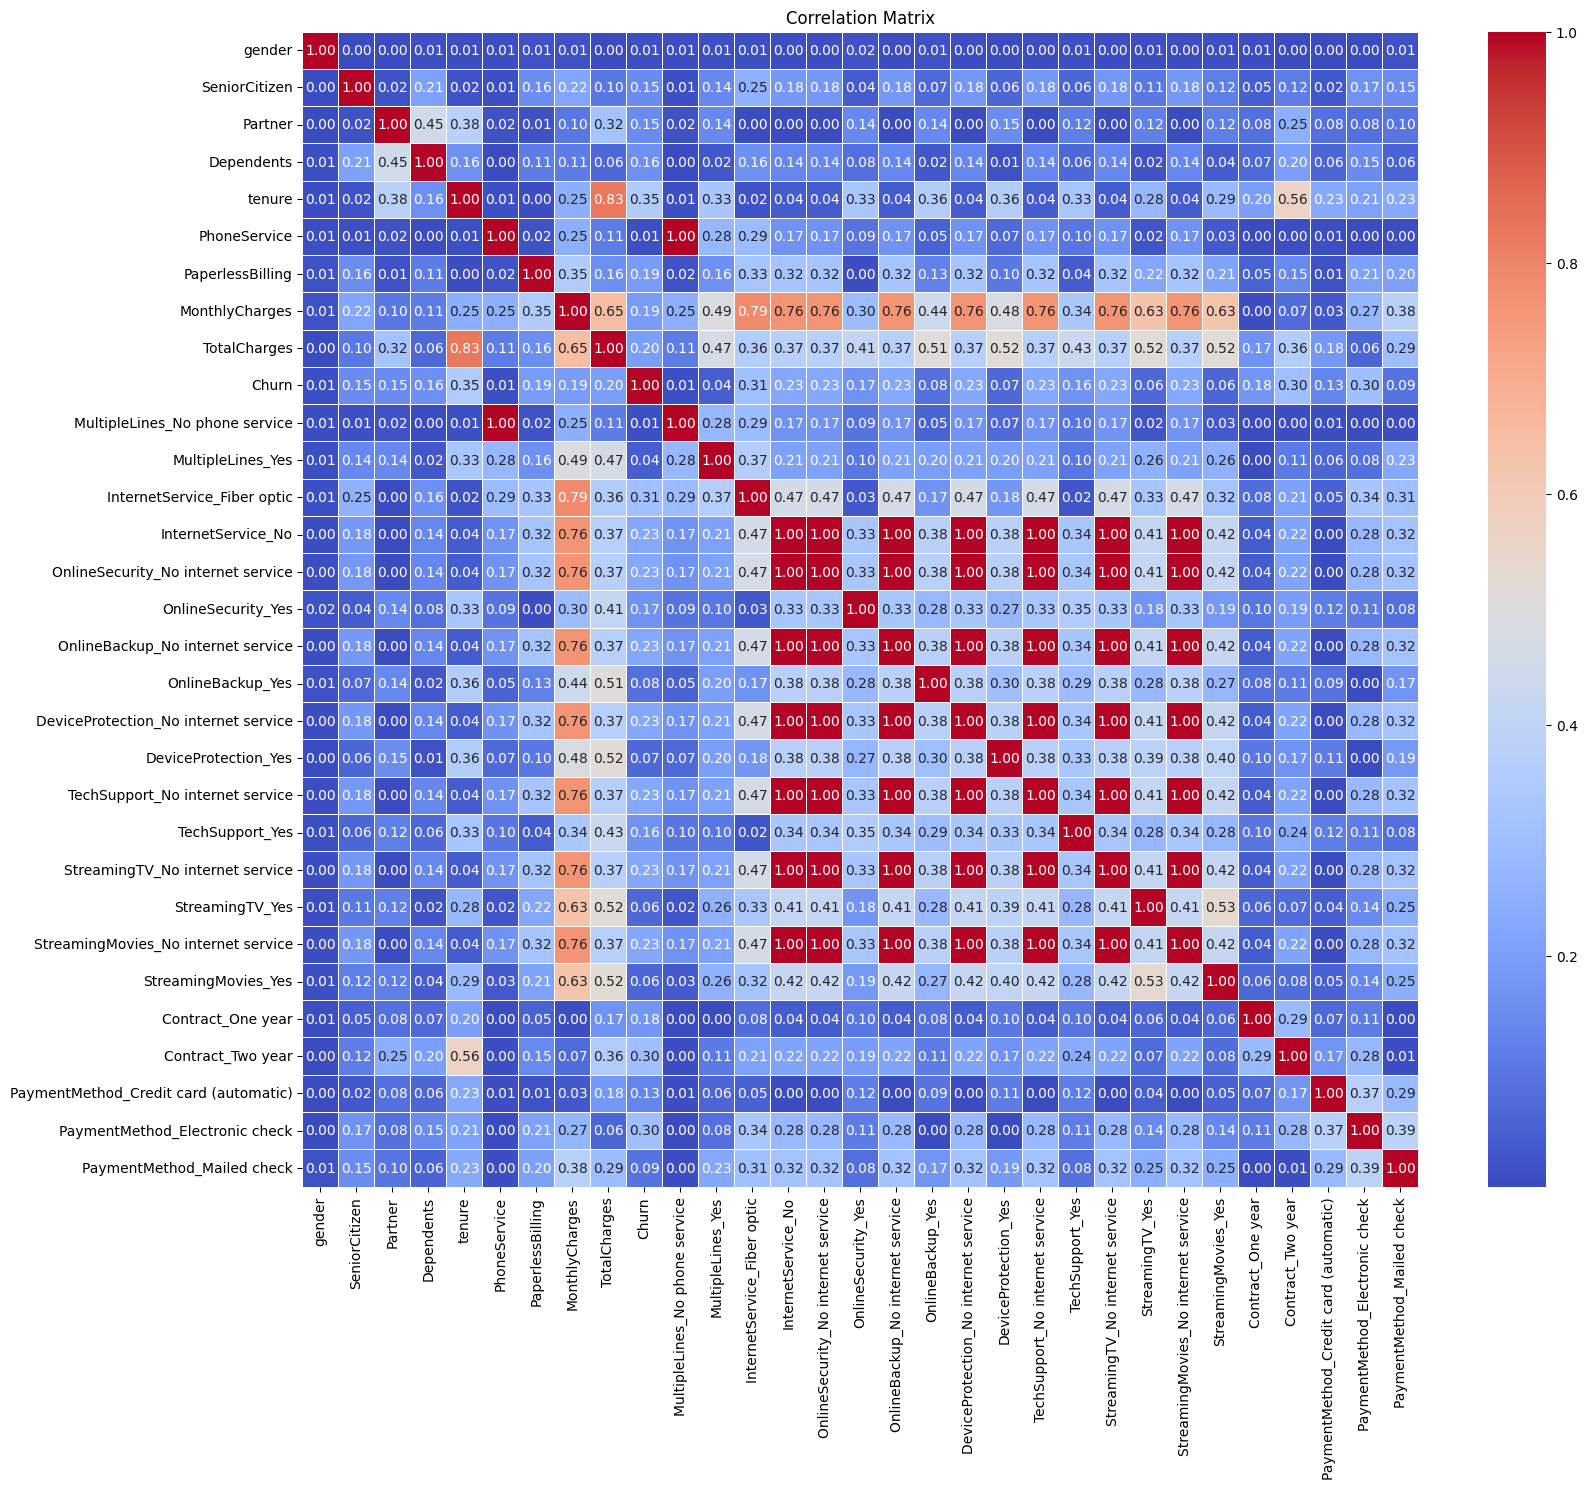

In [26]:
correlation_matrix = df_copy.corr().abs()

# set up the matplotlib figure
plt.figure(figsize=(18, 15))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

**Insight:**
- Terdapat cukup banyak korelasi dengan koefisien "1.0" yang menggambarkan redundansi fitur, hal ini kebanyakan berhubungan dengan tidak adanya servis internet. Dengan begitu fitur-fitur tersebut akan di-drop
- Sayangnya dataset ini memiliki korelasi antar-fitur yang cukup minim, ini akan mempengaruh besar terhadap hasil sillhouette skor. Perlu dilakukan seleksi fitur lebih mendalam

In [27]:
#drop redundansi

upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Cari kolom yang memiliki korelasi lebih dari threshold (0.9) dengan kolom lain
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print("Fitur yang akan di-drop (korelasi > 0.9):", to_drop)

df_featsel = df_copy.drop(columns=to_drop).copy()

df_featsel.info()

Fitur yang akan di-drop (korelasi > 0.9): ['MultipleLines_No phone service', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service']
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   float64
 5   PhoneService                           7032 non-null   int64  
 6   PaperlessBilling                       7032 non-n

In [28]:
# sortir korelasi fitur dengan Churn
df_featsel.corr()['Churn'].sort_values(ascending = False)

,Churn
Churn,1.000000
InternetService_Fiber optic,0.307463
PaymentMethod_Electronic check,0.301455
MonthlyCharges,0.192858
PaperlessBilling,0.191454
SeniorCitizen,0.150541
StreamingTV_Yes,0.063254
StreamingMovies_Yes,0.060860
MultipleLines_Yes,0.040033
PhoneService,0.011691


##Seleksi fitur kategorikal menggunakan chi2 dengan target Churn

In [29]:
from sklearn.feature_selection import chi2, SelectKBest

continuous_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
# Fitur kategorikal: semua kolom kecuali fitur kontinu dan target 'Churn'
categorical_features = [col for col in df_featsel.columns if col not in continuous_features + ['Churn']]

# Mendiskritkan fitur kontinu dengan binning
df_featsel_binned = df_featsel.copy()
for col in continuous_features:
    df_featsel_binned[col + '_binned'] = pd.cut(df_featsel_binned[col], bins=4, labels=False)

# Buat DataFrame X yang merupakan gabungan fitur binned dan fitur kategorikal
binned_continuous = [col + '_binned' for col in continuous_features]
X = df_featsel_binned[binned_continuous + categorical_features].copy()

# Pastikan seluruh kolom di X bersifat numerik
for col in X.columns:
    if X[col].dtype.name == 'category':
        X[col] = X[col].cat.codes
    elif X[col].dtype == object:
        X[col] = X[col].astype('category').cat.codes

# Target y: gunakan kolom 'Churn', Jika belum numerik maka konversikan.
y = df_featsel_binned['Churn']
if y.dtype.name == 'category' or y.dtype == object:
    y = y.astype('category').cat.codes

chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(X, y)
chi2_scores = chi2_selector.scores_
p_values = chi2_selector.pvalues_

chi2_results = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi2_scores,
    'p-value': p_values
}).sort_values(by='Chi2 Score', ascending=False)

print("Hasil Uji Chi-Square untuk Feature Selection:")
print(chi2_results)

Hasil Uji Chi-Square untuk Feature Selection:
                                  Feature  Chi2 Score        p-value
0                           tenure_binned  903.029788  2.153686e-198
19                      Contract_Two year  486.223101  9.454286e-108
21         PaymentMethod_Electronic check  424.113152   3.105849e-94
10            InternetService_Fiber optic  372.082851   6.587130e-83
11                     InternetService_No  285.475152   4.814000e-64
2                     TotalCharges_binned  252.372795   7.891481e-57
1                   MonthlyCharges_binned  249.744330   2.952420e-56
18                      Contract_One year  176.608724   2.666317e-40
12                     OnlineSecurity_Yes  147.165601   7.219883e-34
15                        TechSupport_Yes  135.439602   2.645952e-31
4                           SeniorCitizen  133.482766   7.089546e-31
6                              Dependents  131.271509   2.159540e-30
8                        PaperlessBilling  104.979224   1

In [30]:
# Filter data berdasarkan hasil

threshold_p = 0.05
threshold_score = 150

selected = chi2_results[(chi2_results['p-value'] < threshold_p) & (chi2_results['Chi2 Score'] >= threshold_score)]
dropped = chi2_results[~((chi2_results['p-value'] < threshold_p) & (chi2_results['Chi2 Score'] >= threshold_score))]

selected_features = selected['Feature'].tolist()
dropped_features = dropped['Feature'].tolist()

print("\nFitur yang dipertahankan (p-value < 0.05 dan Chi2 Score >= 10):")
print(selected_features)
print("\nFitur yang di-drop:")
print(dropped_features)

df_featsel2 = X[selected_features].copy()

df_featsel2 = df_featsel2.drop(columns=['tenure_binned', 'MonthlyCharges_binned', 'TotalCharges_binned'])
df_featsel2 = pd.concat([df_featsel2, df_featsel[['tenure', 'MonthlyCharges', 'TotalCharges','Churn']]], axis=1)

print(f"\nDataframe sebelum: {X.shape} -> dataframe setelah feature selection: {df_featsel2.shape}")


Fitur yang dipertahankan (p-value < 0.05 dan Chi2 Score >= 10):
['tenure_binned', 'Contract_Two year', 'PaymentMethod_Electronic check', 'InternetService_Fiber optic', 'InternetService_No', 'TotalCharges_binned', 'MonthlyCharges_binned', 'Contract_One year']

Fitur yang di-drop:
['OnlineSecurity_Yes', 'TechSupport_Yes', 'SeniorCitizen', 'Dependents', 'PaperlessBilling', 'PaymentMethod_Credit card (automatic)', 'Partner', 'PaymentMethod_Mailed check', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'MultipleLines_Yes', 'gender', 'PhoneService']

Dataframe sebelum: (7032, 23) -> dataframe setelah feature selection: (7032, 9)


In [31]:
df_featsel2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Contract_Two year               7032 non-null   bool   
 1   PaymentMethod_Electronic check  7032 non-null   bool   
 2   InternetService_Fiber optic     7032 non-null   bool   
 3   InternetService_No              7032 non-null   bool   
 4   Contract_One year               7032 non-null   bool   
 5   tenure                          7032 non-null   float64
 6   MonthlyCharges                  7032 non-null   float64
 7   TotalCharges                    7032 non-null   float64
 8   Churn                           7032 non-null   int64  
dtypes: bool(5), float64(3), int64(1)
memory usage: 309.0 KB


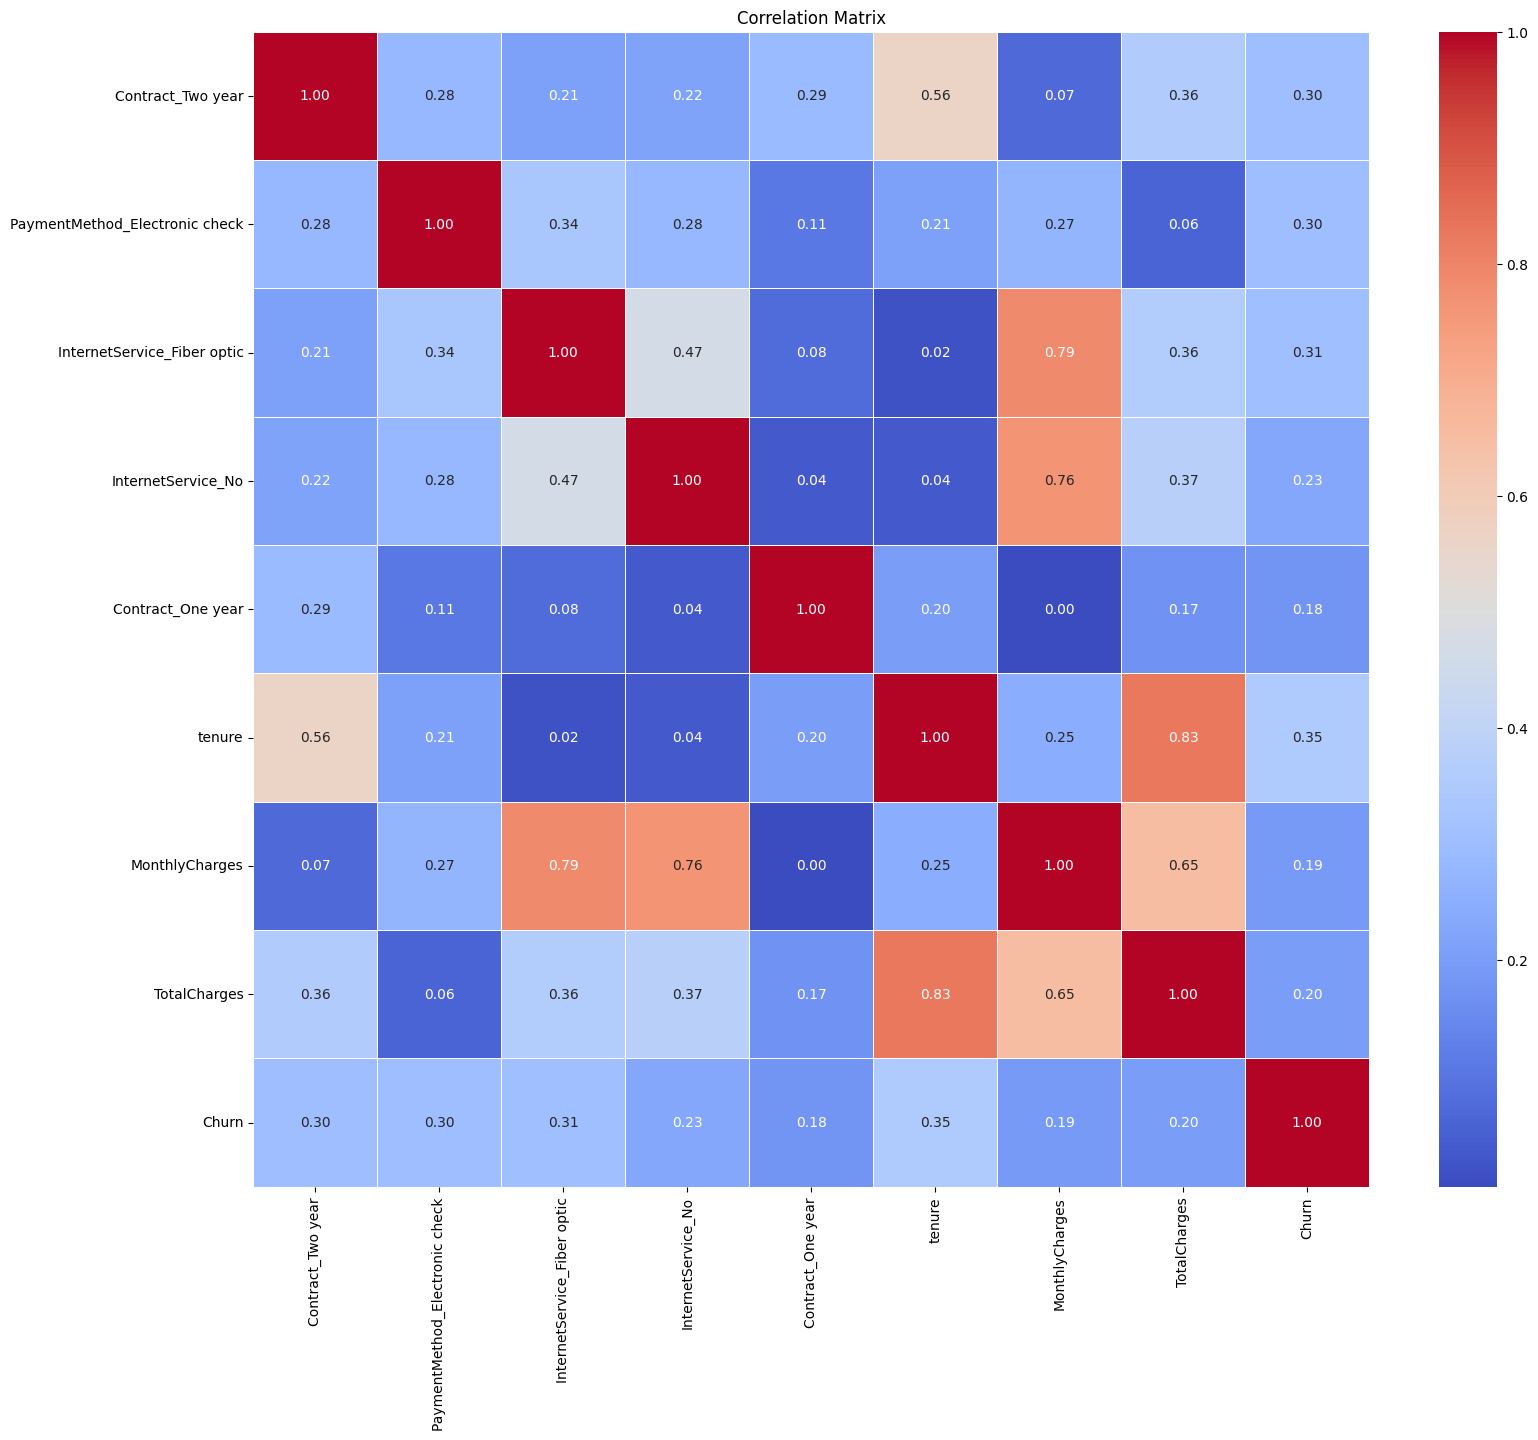

In [32]:
correlation_matrix2 = df_featsel2.corr().abs()

# set up the matplotlib figure
plt.figure(figsize=(18, 15))

sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

##Perbandingan evaluasi K-means

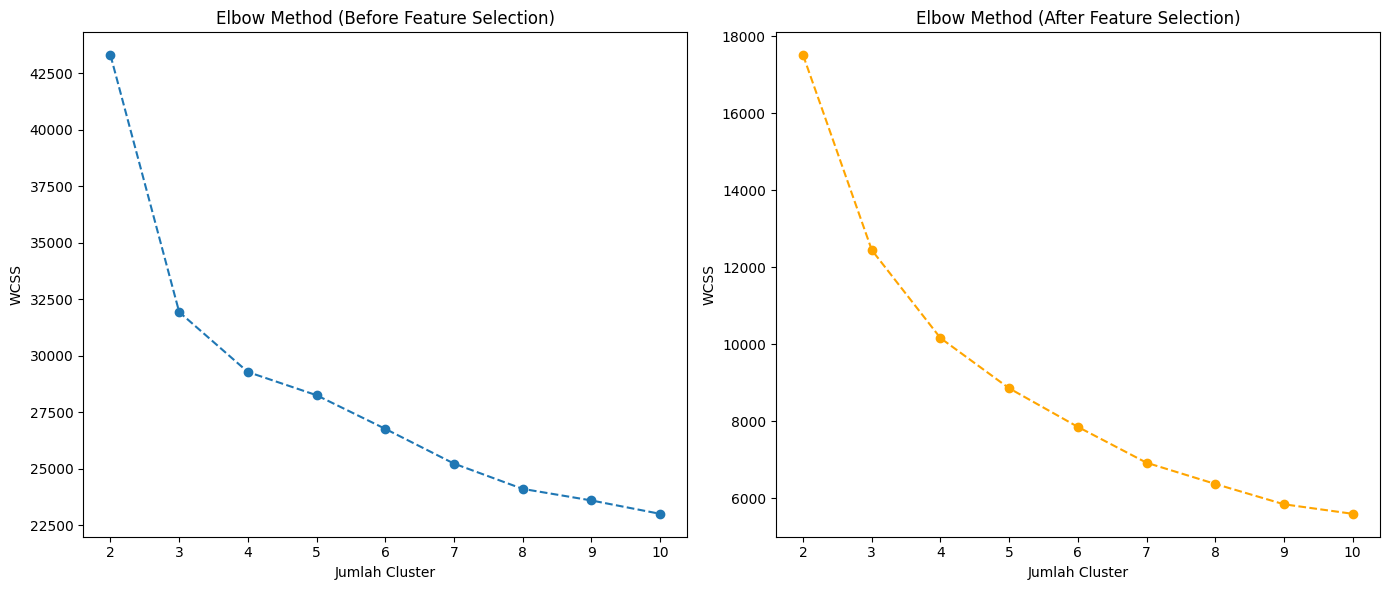

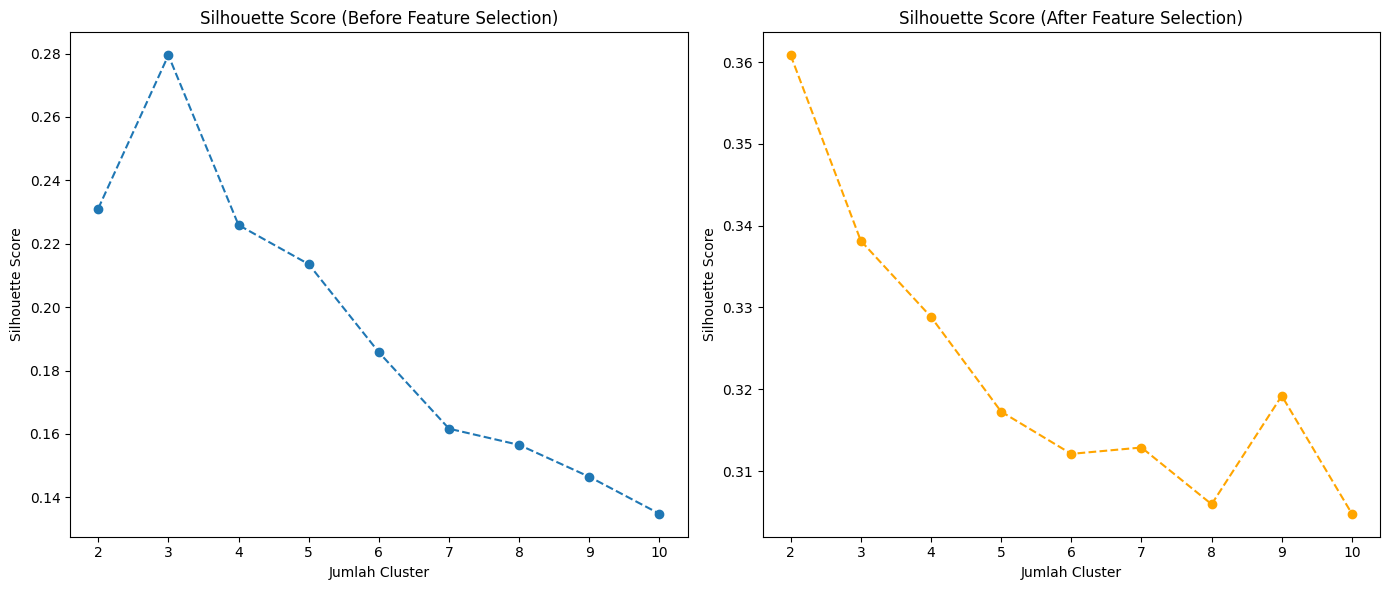

In [33]:
# Range jumlah cluster yang akan diuji
cluster_range = range(2, 11)

# Data Sebelum Feature Selection (df_copy)
wcss_before = []
silhouette_scores_before = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df_copy)
    wcss_before.append(kmeans.inertia_)

    labels = kmeans.labels_
    sil = silhouette_score(df_copy, labels)
    silhouette_scores_before.append(sil)

# Data Setelah Feature Selection (df_featsel)
wcss_after = []
silhouette_scores_after = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df_featsel2)
    wcss_after.append(kmeans.inertia_)

    labels = kmeans.labels_
    sil = silhouette_score(df_featsel2, labels)
    silhouette_scores_after.append(sil)

# Elbow Method
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(list(cluster_range), wcss_before, marker='o', linestyle='--')
plt.title('Elbow Method (Before Feature Selection)')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.xticks(list(cluster_range))

plt.subplot(1, 2, 2)
plt.plot(list(cluster_range), wcss_after, marker='o', linestyle='--', color='orange')
plt.title('Elbow Method (After Feature Selection)')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.xticks(list(cluster_range))
plt.tight_layout()
plt.show()

# Visualisasi Silhouette Score
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(list(cluster_range), silhouette_scores_before, marker='o', linestyle='--')
plt.title('Silhouette Score (Before Feature Selection)')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.xticks(list(cluster_range))

plt.subplot(1, 2, 2)
plt.plot(list(cluster_range), silhouette_scores_after, marker='o', linestyle='--', color='orange')
plt.title('Silhouette Score (After Feature Selection)')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.xticks(list(cluster_range))
plt.tight_layout()
plt.show()

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


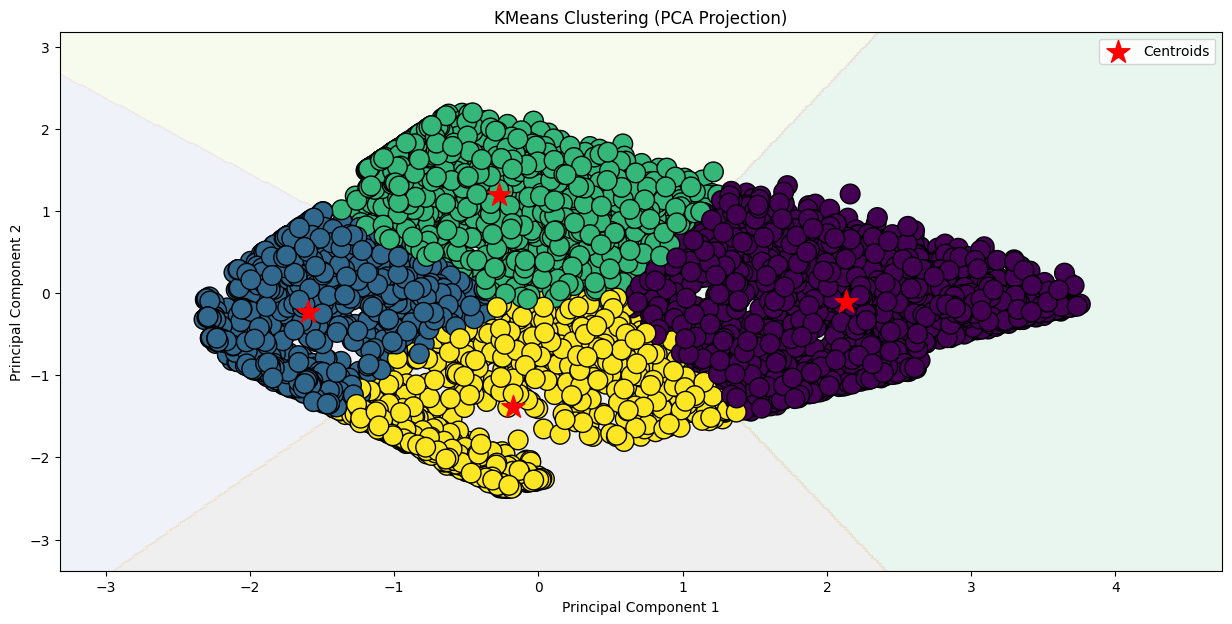

Silhouette Score: 0.3288


In [34]:
from sklearn.decomposition import PCA

# drop cluster sebelumnya jika ada
if 'Cluster' in df_featsel2.columns:
    df_featsel2.drop(columns=['Cluster'], inplace=True)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_featsel2)

optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, max_iter=300,
                tol=0.0001, random_state=111, algorithm='elkan')
kmeans.fit(df_featsel2)
labels = kmeans.labels_
centroids_pca = pca.transform(kmeans.cluster_centers_)  # Transform centroid ke PCA space

# Plot decision boundaries
h = 0.02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Prediksi cluster untuk meshgrid (di PCA space)
Z = kmeans.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

plt.figure(figsize=(15, 7))
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel2, alpha=0.3)

# Plot data points dalam PCA space
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=200, cmap='viridis', edgecolor='k')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='red', marker='*', label='Centroids')

plt.title('KMeans Clustering (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Silhouette Score
from sklearn.metrics import silhouette_score
print(f"Silhouette Score: {silhouette_score(df_featsel2, labels):.4f}")

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [35]:
# Simpan hasil clustering ke df_featsel2 (data normalisasi)
df_featsel2['Cluster'] = labels
df_featsel2['Cluster'].head()

,Cluster
0,1
1,3
2,1
3,3
4,2


In [36]:
df_featsel2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Contract_Two year               7032 non-null   bool   
 1   PaymentMethod_Electronic check  7032 non-null   bool   
 2   InternetService_Fiber optic     7032 non-null   bool   
 3   InternetService_No              7032 non-null   bool   
 4   Contract_One year               7032 non-null   bool   
 5   tenure                          7032 non-null   float64
 6   MonthlyCharges                  7032 non-null   float64
 7   TotalCharges                    7032 non-null   float64
 8   Churn                           7032 non-null   int64  
 9   Cluster                         7032 non-null   int32  
dtypes: bool(5), float64(3), int32(1), int64(1)
memory usage: 336.5 KB


In [37]:
# Inverse transform untuk fitur kategorikal (one-hot encoding)
import numpy as np

df_original = df_featsel2.copy()

# Inverse transform untuk kolom Contract
df_original["Contract"] = np.select(
    [df_original["Contract_Two year"], df_original["Contract_One year"]],
    ["Two year", "One year"],
    default="Month-to-month"
)

# Inverse transform untuk kolom InternetService
df_original["InternetService"] = np.select(
    [df_original["InternetService_Fiber optic"], df_original["InternetService_No"]],
    ["Fiber optic", "No"],
    default="DSL"
)

# Inverse transform untuk kolom PaymentMethod
df_original["PaymentMethod"] = np.where(
    df_original["PaymentMethod_Electronic check"],
    "Electronic check",
    "Other"
)

# Hapus kolom boolean hasil one-hot encoding
df_original.drop(columns=[
    "Contract_Two year", "Contract_One year",
    "PaymentMethod_Electronic check",
    "InternetService_Fiber optic", "InternetService_No"
], inplace=True)

df_original.info()
df_original.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tenure           7032 non-null   float64
 1   MonthlyCharges   7032 non-null   float64
 2   TotalCharges     7032 non-null   float64
 3   Churn            7032 non-null   int64  
 4   Cluster          7032 non-null   int32  
 5   Contract         7032 non-null   object 
 6   InternetService  7032 non-null   object 
 7   PaymentMethod    7032 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(3)
memory usage: 467.0+ KB


,tenure,MonthlyCharges,TotalCharges,Churn,Cluster,Contract,InternetService,PaymentMethod
0,-1.280248,-1.161694,-0.994194,0,1,Month-to-month,DSL,Electronic check
1,0.064303,-0.260878,-0.173740,0,3,One year,DSL,Other
2,-1.239504,-0.363923,-0.959649,1,1,Month-to-month,DSL,Other
3,0.512486,-0.747850,-0.195248,0,3,One year,DSL,Other
4,-1.239504,0.196178,-0.940457,1,2,Month-to-month,Fiber optic,Electronic check


In [38]:
# Pindahkan kolom "Cluster" ke paling kanan
df_original = df_original[[col for col in df_original.columns if col != "Cluster"] + ["Cluster"]]

df_original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tenure           7032 non-null   float64
 1   MonthlyCharges   7032 non-null   float64
 2   TotalCharges     7032 non-null   float64
 3   Churn            7032 non-null   int64  
 4   Contract         7032 non-null   object 
 5   InternetService  7032 non-null   object 
 6   PaymentMethod    7032 non-null   object 
 7   Cluster          7032 non-null   int32  
dtypes: float64(3), int32(1), int64(1), object(3)
memory usage: 467.0+ KB


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [39]:
# inverse transform untuk data numerik

df_original[numerical_features] = scaler.inverse_transform(df_original[numerical_features])

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [40]:
# Analisis distribusi nilai dalam setiap cluster
cluster_analysis = df_original.groupby("Cluster").agg({
    "tenure": "mean",
    "MonthlyCharges": "mean",
    "TotalCharges": "mean",
    "Churn": "mean"
}).reset_index()

# Menampilkan hasil analisis
for index, row in cluster_analysis.iterrows():
    cluster_id = int(row["Cluster"])
    tenure_mean = row["tenure"]
    monthly_charges_mean = row["MonthlyCharges"]
    total_charges_mean = row["TotalCharges"]
    churn_rate = row["Churn"] * 100  # Persentase pelanggan yang churn

    print(f"Cluster {cluster_id}:")
    print(f"Rata-rata Tenure (bulan): {tenure_mean:.2f}")
    print(f"Rata-rata Monthly Charges: {monthly_charges_mean:.2f}")
    print(f"Rata-rata Total Charges: {total_charges_mean:.2f}")
    print(f"Persentase Churn: {churn_rate:.2f}%")

    # Analisis berdasarkan kategori kontrak, internet, dan metode pembayaran
    contract_mode = df_original[df_original["Cluster"] == cluster_id]["Contract"].mode()[0]
    internet_mode = df_original[df_original["Cluster"] == cluster_id]["InternetService"].mode()[0]
    payment_mode = df_original[df_original["Cluster"] == cluster_id]["PaymentMethod"].mode()[0]

    print(f"Mayoritas jenis kontrak: {contract_mode}")
    print(f"Mayoritas jenis layanan internet: {internet_mode}")
    print(f"Mayoritas metode pembayaran: {payment_mode}")

    # Interpretasi tambahan berdasarkan churn rate
    if churn_rate > 50:
        print("Analisis: Cluster ini memiliki tingkat churn tinggi. Kemungkinan pelanggan tidak puas atau kontrak mereka lebih fleksibel.")
    elif churn_rate < 20:
        print("Analisis: Cluster ini memiliki tingkat churn rendah, menunjukkan loyalitas pelanggan yang tinggi.")
    else:
        print("Analisis: Cluster ini memiliki churn sedang, ada kombinasi pelanggan tetap dan pelanggan yang rentan churn.")

    print("-" * 50)

Cluster 0:
Rata-rata Tenure (bulan): 59.97
Rata-rata Monthly Charges: 94.03
Rata-rata Total Charges: 5637.32
Persentase Churn: 14.54%
Mayoritas jenis kontrak: Two year
Mayoritas jenis layanan internet: Fiber optic
Mayoritas metode pembayaran: Other
Analisis: Cluster ini memiliki tingkat churn rendah, menunjukkan loyalitas pelanggan yang tinggi.
--------------------------------------------------
Cluster 1:
Rata-rata Tenure (bulan): 11.06
Rata-rata Monthly Charges: 35.58
Rata-rata Total Charges: 392.54
Persentase Churn: 22.97%
Mayoritas jenis kontrak: Month-to-month
Mayoritas jenis layanan internet: DSL
Mayoritas metode pembayaran: Other
Analisis: Cluster ini memiliki churn sedang, ada kombinasi pelanggan tetap dan pelanggan yang rentan churn.
--------------------------------------------------
Cluster 2:
Rata-rata Tenure (bulan): 15.22
Rata-rata Monthly Charges: 83.93
Rata-rata Total Charges: 1301.15
Persentase Churn: 54.78%
Mayoritas jenis kontrak: Month-to-month
Mayoritas jenis layanan

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

##Cluster 1:
- **Rata-rata Tenure:** 59.97 bulan  
- **Rata-rata Monthly Charges:** \$94.03  
- **Rata-rata Total Charges:** \$5,637.32  
- **Persentase Churn:** 14.54%  
- **Karakteristik Utama:**
  - Kontrak: Two year (mayoritas)
  - Layanan Internet: Fiber optic
  - Metode Pembayaran: Non-electronic (Other)
- **Analisis:**  
Cluster ini merepresentasikan pelanggan loyal dengan pengeluaran tinggi. Kombinasi kontrak jangka panjang dan penggunaan fiber optic menunjukkan mereka adalah pelanggan bernilai tinggi dengan loyalitas kuat dan risiko churn rendah.

## Cluster 2:
- **Rata-rata Tenure:** 11.06 bulan  
- **Rata-rata Monthly Charges:** \$35.58  
- **Rata-rata Total Charges:** \$392.54  
- **Persentase Churn:** 22.97%  
- **Karakteristik Utama:**
  - Kontrak: Month-to-month
  - Layanan Internet: DSL
  - Metode Pembayaran: Non-electronic (Other)
- **Analisis:**  
Pelanggan baru dengan pengeluaran rendah. Kontrak fleksibel dan penggunaan DSL menunjukkan mereka mungkin pelanggan "wait-and-see" yang masih mengevaluasi layanan. Perlu strategi retensi khusus.

## Cluster 3:
- **Rata-rata Tenure:** 15.22 bulan  
- **Rata-rata Monthly Charges:** \$83.93  
- **Rata-rata Total Charges:** \$1,301.15  
- **Persentase Churn:** 54.78%  
- **Karakteristik Utama:**
  - Kontrak: Month-to-month
  - Layanan Internet: Fiber optic
  - Metode Pembayaran: Electronic check
- **Analisis:**  
Segment berisiko tinggi dengan churn sangat tinggi. Meskipun menggunakan layanan premium (fiber), kontrak fleksibel dan pembayaran elektronik membuat mereka mudah berpindah. Prioritas utama untuk program retensi.

## Cluster 4:
- **Rata-rata Tenure:** 53.02 bulan  
- **Rata-rata Monthly Charges:** \$37.27  
- **Rata-rata Total Charges:** \$1,931.33  
- **Persentase Churn:** 4.59%  
- **Karakteristik Utama:**
  - Kontrak: Two year
  - Layanan Internet: No internet service
  - Metode Pembayaran: Non-electronic (Other)
- **Analisis:**  
Pelanggan stabil dengan kebutuhan dasar (tanpa internet). Loyalitas sangat tinggi dengan churn terendah. Kelompok ini mungkin terdiri dari pelanggan tradisional yang kurang terpapar kompetitor.

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [41]:
df_original.to_csv("Telco-Customer_Clustered.csv", index=False)